In [15]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [16]:
def _erosion(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(kh,m-kh):
        for j in range(kw,n-kw):
            flag = 1
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i+x)<img.shape[0] and (i+x)>=0 and (j+y)<img.shape[1] and (j+y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]!=img[i+x][j+y]:
                            flag=0
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

In [17]:
def _dilation(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros_like(img)
    m, n = img.shape


    for i in range(m):
        for j in range(n):
            flag = 0
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i-x)<img.shape[0] and (i-x)>=0 and (j-y)<img.shape[1] and (j-y)>=0:
                        if kernel[x+kh][y+kw]==2:
                            continue
                        if kernel[x+kh][y+kw]==img[i-x][j-y]:
                            flag=1
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

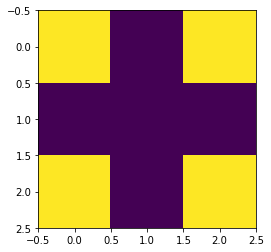

In [18]:
kernel = np.zeros((3,3), np.uint8)
kernel[0,0]=kernel[0,2]=kernel[2,0]=kernel[2,2]=2
kernel[:,1]=kernel[1,:]=1
plt.imshow(kernel)

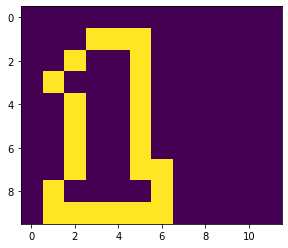

In [19]:
img = np.zeros((10,12), np.uint8)
img[1,3:6]=img[1:8,5]=img[9,1:7]=img[7:10,6] =  img[7,6]= img[4:8, 2]=img[3,1]=img[2,2]=img[8,1]=  1
plt.imshow(img)

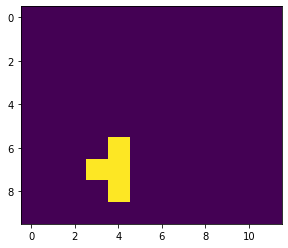

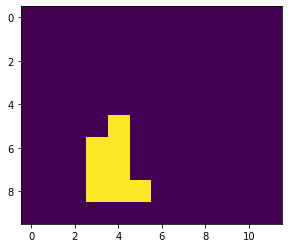

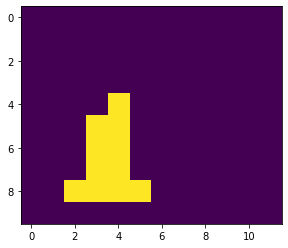

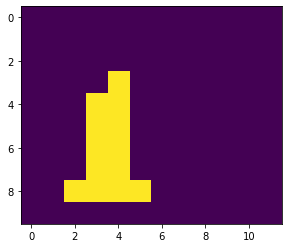

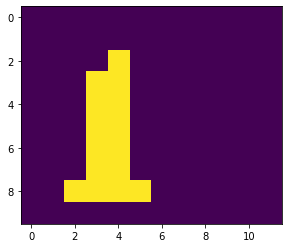

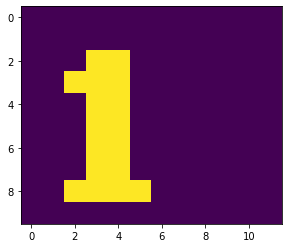

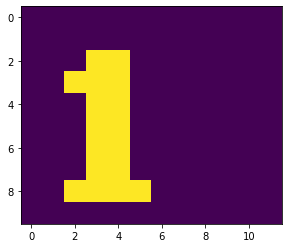

7


In [20]:
X = np.zeros_like(img)
X[7,4]=1
Ac = 1 - img
count=0
while(True):
    count=count+1
    prevX = X
    a = _dilation(X,kernel)
    X = np.bitwise_and(a, Ac)
    plt.imshow(X)
    plt.show()
    if np.array_equal(X, prevX):
        break
print(count)

Text(0.5, 1.0, 'PSF')

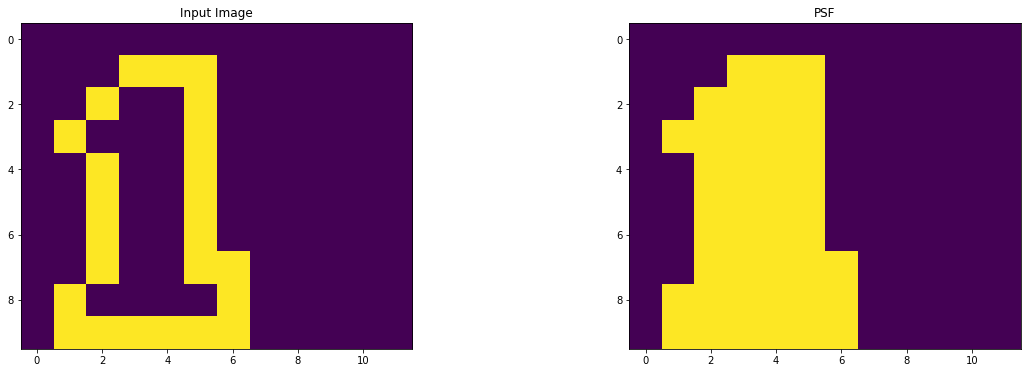

In [21]:
final_output = np.bitwise_or(X, img)
figure, axis = plt.subplots(1,2, figsize=(20, 6))
axis[0].imshow(img)
axis[0].set_title("Input Image")

axis[1].imshow(final_output)
axis[1].set_title("PSF")